# Practical-3
Use unsupervised machine learning to segment
customers based on behavior or demographic data.
Save the trained clustering model using pickle, and allow predictions (cluster assignment) on new customer data dynamically. Use a publicly available
dataset like the Mall Customers dataset:
Download Mall Customers Dataset (CSV)
Available columns:
CustomerID
Gender
Age
Annual Income (k$)
Spending Score (1–100)

## Step-1: Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import pickle

## Step-2: Loading and Exploring the Dataset

In [3]:
df = pd.read_csv('/content/Mall_customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


## Step-3: Data Preprocessing
*   Encoding Gender (Male/Female -> 0/1)

In [6]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [7]:
# Selecting features for clustering
X = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [8]:
# Data Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Step-4: Finding Optimal Number of Clusters using Elbow Method

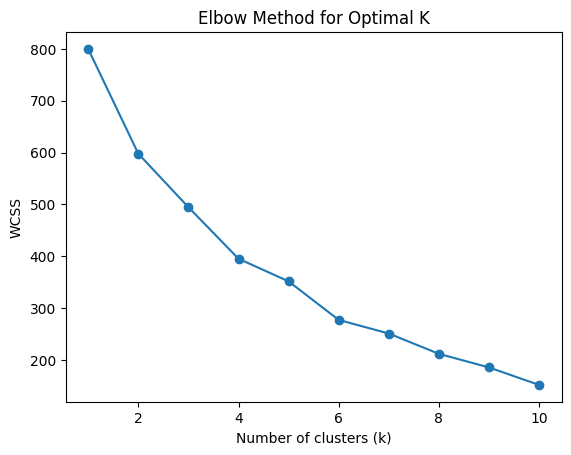

In [9]:
wcss = []  # within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS")
plt.show()

## Step-5: Training K-Means Model

In [11]:
kmeans = KMeans(n_clusters=5, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

In [12]:
# Adding cluster labels to the dataframe
df['Cluster'] = y_kmeans

# Viewing cluster counts
print(df['Cluster'].value_counts())

Cluster
0    51
3    49
2    42
4    38
1    20
Name: count, dtype: int64


## Step-6: Clusters Visualization

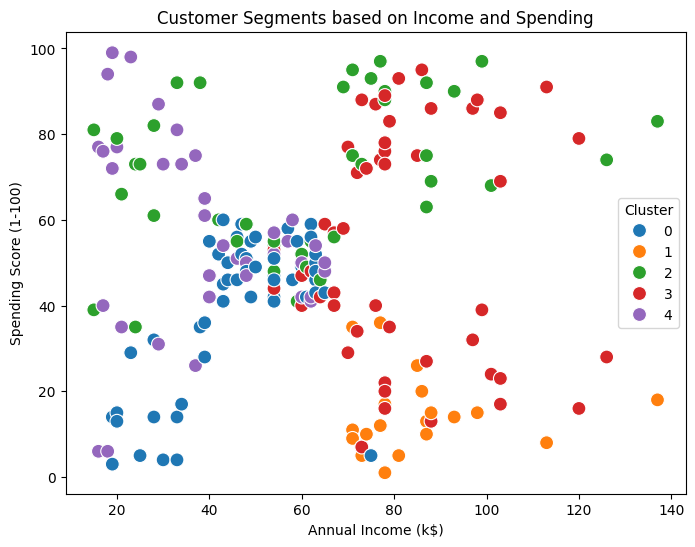

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Annual Income (k$)'],
    y=df['Spending Score (1-100)'],
    hue=df['Cluster'],
    palette='tab10',
    s=100)
plt.title("Customer Segments based on Income and Spending")
plt.show()

## Step-7: Saving the Trained Model and Scaler using `pickle`

In [19]:
with open('kmeans_model.pkl', 'wb') as model_file:
    pickle.dump(kmeans, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

## Step-8: Loading the Model and Making Predictions on New Data

In [23]:
loaded_model = pickle.load(open('kmeans_model.pkl', 'rb'))
loaded_scaler = pickle.load(open('scaler.pkl', 'rb'))

In [25]:
# Example: new customer data
new_data = pd.DataFrame({
    'Gender': [1],       # 1 = Male, 0 = Female
    'Age': [26],
    'Annual Income (k$)': [55],
    'Spending Score (1-100)': [60]   # Use hyphen "-" not en dash "–"
})

In [26]:
# Scaling new data
new_data_scaled = loaded_scaler.transform(new_data)

# Predicting cluster
predicted_cluster = loaded_model.predict(new_data_scaled)
print(f"Predicted Cluster: {predicted_cluster[0]}")

Predicted Cluster: 2
